# Classifying Handwritten Digits in PyTorch from MNIST

Classifying images is one of the most basic use for machine learning, and has the most number of publicaly available pretrained networks as a result.

In this notebook, we will take a predefined network called the ResNet-18, and train it on the MNIST hand written digits dataset.

The MNIST dataset is a collection of 60,000 single grey scale images with the size 29 x 29, with labels showing which digit the image is of.

In [1]:
import torch
import torch.optim as optim
from torch import nn
from torch.utils.data import DataLoader
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from IPython import display
import numpy as np
import os
import torchvision.models as models

# Define our classifier

We will use the ResNet-18 model, but modify the input to take in a single channel instead of 3 channels. This is usually done because most images have RGB values, while MNIST is grey scale.

We will also modify the output of the model to have 10 classes, rather than the default 1000 classes.

In a classification problem, the loss function to use is the cross entropy, and we will train the entire model parameters.



In [2]:
def Model():
    import torchvision.models as models
    model = models.resnet18()
    model.conv1 = nn.Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    model.avgpool = nn.Flatten()
    model.fc = nn.Linear(512, 10)
    return model

def kernel_wrapper(module):
    for name, layer in module._modules.items():
        kernel_wrapper(layer)
        if isinstance(layer, nn.ReLU):

            module._modules[name] = nn.ELU(1)

def Model():
    import torchvision.models as models
    model = models.resnet18()
    model.conv1 = nn.Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    model.avgpool = nn.Flatten()
    model.fc = nn.Linear(512, 10)
    kernel_wrapper(model)
    return model

model=Model()
print(model)

criterion = nn.CrossEntropyLoss()
optimizer = optim.RMSprop(model.parameters(), lr=0.001)

ResNet(
  (conv1): Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ELU(alpha=1)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ELU(alpha=1)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ELU(alpha=1)
      (conv2): Conv2

# Defining our datasets

We will be defining 2 datasets for MNIST, one for the training data and another for the test data.

The training data is what is use to update the parameters of the network. 

We can monitor the progress the loss and the prediction from the training dataset, but this doesn't tell us if the model is just memorizing the input to the output.

To see if the model is generalizing well, we use another dataset, the test dataset, which has no overlap with the training dataset.

In [3]:
batch_size = 100

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, ), (0.5, ))])

trainset = torchvision.datasets.MNIST('', train=True, download=True, transform=transform)
testset  = torchvision.datasets.MNIST('', train=False, download=False, transform=transform)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True)
testloader  = torch.utils.data.DataLoader(testset , batch_size=batch_size, shuffle=True)

#Load the test data and compare the output with the label
def get_accuracy():
    x,label=testloader.__iter__().__next__()
    model.eval()
    y = model(x).argmax(1)
    model.train()
    total = (label == y).sum().item()
    return total/batch_size

#Plot loss and accuracy
def plot(x,y):
    plt.clf()
    ax = plt.gca()
    ax.yaxis.tick_right()
    ax.yaxis.set_ticks_position('both')
    ax.yaxis.grid(True)
    

    plt.plot(x)
    plt.plot(y)
    
    plt.legend(['Loss','Accuracy'], loc='lower left')
    
    display.clear_output(wait=True)
    display.display(plt.gcf())

# Train loop

In PyTorch, the basic train loop consists of 


1.   Loading training data
2.   Initilize gradients for the model
3.   Forward pass until the loss
4.   Backpropagate the loss
5.   Do the optimization step

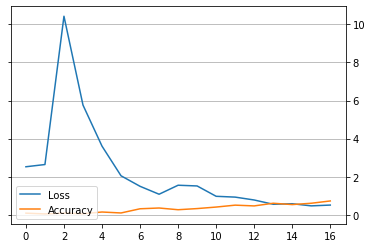

loss:2.525111, test accuracy:0.09
loss:2.641761, test accuracy:0.05
loss:10.424326, test accuracy:0.09
loss:5.762554, test accuracy:0.06
loss:3.606936, test accuracy:0.15
loss:2.050728, test accuracy:0.1
loss:1.498754, test accuracy:0.32
loss:1.083152, test accuracy:0.36
loss:1.555298, test accuracy:0.27
loss:1.517674, test accuracy:0.33
loss:0.974602, test accuracy:0.41
loss:0.931804, test accuracy:0.51
loss:0.780670, test accuracy:0.47
loss:0.556141, test accuracy:0.61
loss:0.584178, test accuracy:0.54
loss:0.472602, test accuracy:0.61
loss:0.514010, test accuracy:0.73


In [ ]:
losses=[]
accuracies=[]
for epoch in range(10):
    for x,y in trainloader:
        optimizer.zero_grad()
        predict = model(x)
        loss = criterion(predict,y)
        loss.backward()
        optimizer.step()
        
        accuracy = get_accuracy()
        accuracies.append(accuracy)
        losses.append(loss)
        
        plot(losses,accuracies)
        
        for loss,accuracy in zip(losses,accuracies):
            print(f'loss:{loss:5f}, test accuracy:{accuracy}')